   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: fr (French) ...


INFO:stanza:Downloaded file to /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fr (French):
| Processor | Package            |
----------------------------------
| tokenize  | combined           |
| mwt       | combined           |
| pos       | combined_charlm    |
| lemma     | combined_nocharlm  |
| depparse  | combined_charlm    |
| ner       | wikinergold_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


╒════╤═════════╤═══════════╤═══════╕
│    │ Word    │ Lemma     │ POS   │
╞════╪═════════╪═══════════╪═══════╡
│  0 │ La      │ le        │ DET   │
├────┼─────────┼───────────┼───────┤
│  1 │ science │ science   │ NOUN  │
├────┼─────────┼───────────┼───────┤
│  2 │ n'      │ ne        │ ADV   │
├────┼─────────┼───────────┼───────┤
│  3 │ est     │ être      │ AUX   │
├────┼─────────┼───────────┼───────┤
│  4 │ pas     │ pas       │ ADV   │
├────┼─────────┼───────────┼───────┤
│  5 │ la      │ le        │ DET   │
├────┼─────────┼───────────┼───────┤
│  6 │ vérité  │ vérité    │ NOUN  │
├────┼─────────┼───────────┼───────┤
│  7 │ .       │ .         │ PUNCT │
├────┼─────────┼───────────┼───────┤
│  8 │ La      │ le        │ DET   │
├────┼─────────┼───────────┼───────┤
│  9 │ science │ science   │ NOUN  │
├────┼─────────┼───────────┼───────┤
│ 10 │ cherche │ chercher  │ VERB  │
├────┼─────────┼───────────┼───────┤
│ 11 │ la      │ le        │ DET   │
├────┼─────────┼───────────┼───────┤
│

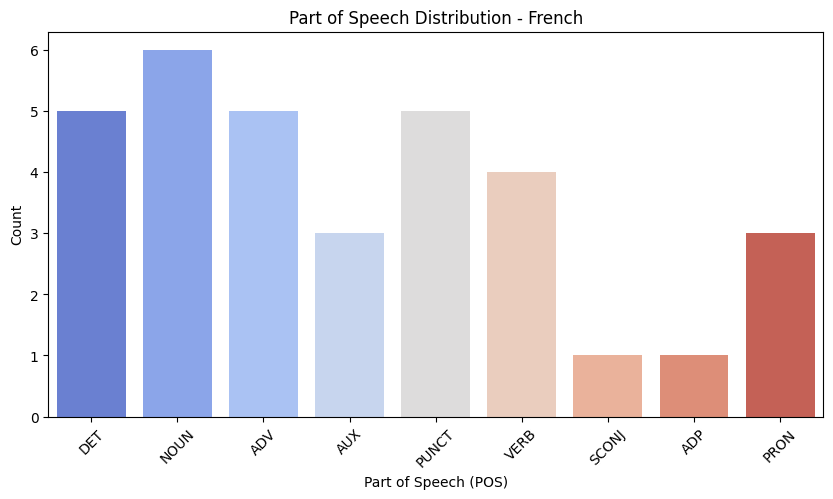

In [3]:
!pip install stanza
import stanza
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

stanza.download("fr")
nlp_fr = stanza.Pipeline("fr")

sentence_fr = "La science n'est pas la vérité. La science cherche la vérité. Quand la science change d'avis, elle n'a pas menti. Elle en a appris plus."
doc_fr = nlp_fr(sentence_fr)

results_fr = [[word.text, word.lemma, word.upos] for sent in doc_fr.sentences for word in sent.words]

df_fr = pd.DataFrame(results_fr, columns=["Word", "Lemma", "POS"])

print(tabulate(df_fr, headers="keys", tablefmt="fancy_grid"))

plt.figure(figsize=(10, 5))
sns.countplot(data=df_fr, x="POS", hue="POS", palette="coolwarm", legend=False)
plt.title("Part of Speech Distribution - French")
plt.xticks(rotation=45)
plt.xlabel("Part of Speech (POS)")
plt.ylabel("Count")
plt.show()